# Импорт библиотек

In [280]:
from google.colab import files # чтобы загружать файлы в облако через проводник

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку

In [281]:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [282]:
from sklearn.tree import DecisionTreeRegressor # Деревья Решений для Регрессии от scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

In [283]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn
from sklearn.ensemble import VotingRegressor

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем Порядковое кодирование от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from sklearn.metrics import make_scorer #функция для создания объекта из метрики для использования в кросс-валидации
from sklearn.cluster import KMeans # Кластеризация К-Средних от scikit-learn\
from sklearn.model_selection import GridSearchCV # для поиска по сетке гиперпараметров

In [284]:
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import confusion_matrix # матрица ошибок от Scikit-learn

from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов от Scikit-learn
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

In [285]:
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
import scipy.stats as stats # статистические функции библиотеки scipy
from scipy.stats import loguniform

from sklearn.linear_model import Lasso # L1-регуляризация
from sklearn.linear_model import Ridge # L2-регуляризация

In [286]:
plt.style.use('dark_background')

# Импорт функций

In [287]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        self.columns = X.columns

        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns

In [288]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [289]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.regressor_.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

In [290]:
def feature_importance_plotter_1(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

In [291]:
def plot_multi(data, y,  names, sub, size, edgecolors = 'none', alpha = 0.5):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]



    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = size, cmap = 'bwr',
                             alpha = alpha, facecolors = 'none' ,
                             linewidths = 2,
                             edgecolors = edgecolors);
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Clusters",
                        fontsize = 15)
        ax.add_artist(legend1)

In [292]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.target_mean = {}

    def fit(self, X, y):
        if self.cols is None:
            self.cols = X.columns
        for col in self.cols:
            self.target_mean[col] = {}
            X_copy = X.copy()
            X_copy[y.name]=y
            self.target_mean[col] = X_copy.groupby(col)[y.name].mean().to_dict()
        return self

    def transform(self, X):
        for col in self.cols:
            X[col] = X[col].map(self.target_mean[col])
            X[col] = X[col].fillna(np.mean(X[col]))
        return X

# Набор данных

**Предсказание цены на дом (из 2й домашки)**

Набор данных представляет собой 1460 строк и 79 переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

С помощью этого датасета решается задача регрессии - предсказать окончательную стоимость дома (перменная SalePrice).

Наша цель - увидеть, как те или иные признаки влияют на стоимость дома, а также их взаимосвязь друг с другом.

Так как признаков очень много, выберу по 5 самых интересующих меня категориальных и числовых признаков для будующей работы.

Выбранные числовые признаки:

LotArea (площадь участка в квадратных футах)

YearBuilt (год постройки)

BedroomAbvGr (кол-во спален выше уровня земли)

GarageArea (площадь гаража в квадратных футах)

MoSold (месяц продажи)

Выбранные категориальные признаки:

Street (тип дороги, ведущей к участку)

Utilities (тип доступных коммунальных услуг)

LotConfig (конфигурация участка)

Condition1 (близость к различным условиям)

RoofStyle (тип крыши)

Нашей целевой переменной остается SalePrice

In [293]:
df = pd.read_csv('https://raw.githubusercontent.com/dariaValerievna/Analytics/refs/heads/dariaValerievna-homework-1/train.csv', delimiter = ',') # считываем файл из интернета
df #выведем DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [294]:
#запишем выбранные признаки в новые переменные
cat_columns_new = ['Street', 'Utilities', 'LotConfig', 'Condition1', 'RoofStyle']
num_columns_new = ['LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'MoSold', 'SalePrice']

#удаляем из датафрейма остальные признаки
df = df.drop(columns=[col for col in df.columns if (col not in cat_columns_new) and (col not in num_columns_new)])

#выведем получившийся датафрейм
df

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,8450,Pave,AllPub,Inside,Norm,2003,Gable,3,548,2,208500
1,9600,Pave,AllPub,FR2,Feedr,1976,Gable,3,460,5,181500
2,11250,Pave,AllPub,Inside,Norm,2001,Gable,3,608,9,223500
3,9550,Pave,AllPub,Corner,Norm,1915,Gable,3,642,2,140000
4,14260,Pave,AllPub,FR2,Norm,2000,Gable,4,836,12,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1456,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1457,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1458,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125


# Предварительная обработка данных

## Предварительная обработка числовых признаков

**Чистим столбцы**

In [295]:
question_lotArea = df[(df.LotArea > 1e5)]
df = df.drop(question_lotArea.index)

question_lotArea_2 = df[(df.LotArea > 16000)]
df = df.drop(question_lotArea_2.index)

question_yearBuilt = df[(df.YearBuilt < 1900)]
df = df.drop(question_yearBuilt.index)

question_garageArea = df[(df.GarageArea < 200)]
df = df.drop(question_garageArea.index)

question_garageArea_1 = df[(df.GarageArea > 1000)]
df = df.drop(question_garageArea_1.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
1239,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1240,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1241,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1242,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125
1243,9937,Pave,AllPub,Inside,Norm,1965,Gable,3,276,6,147500


In [296]:
#удаляем все строки, в которых присутсвует хоть одно значение Nan
df = df.dropna(axis=0)

**Визуализируем**

 Видно, что все столбцы имеют относительно нормальное распределение

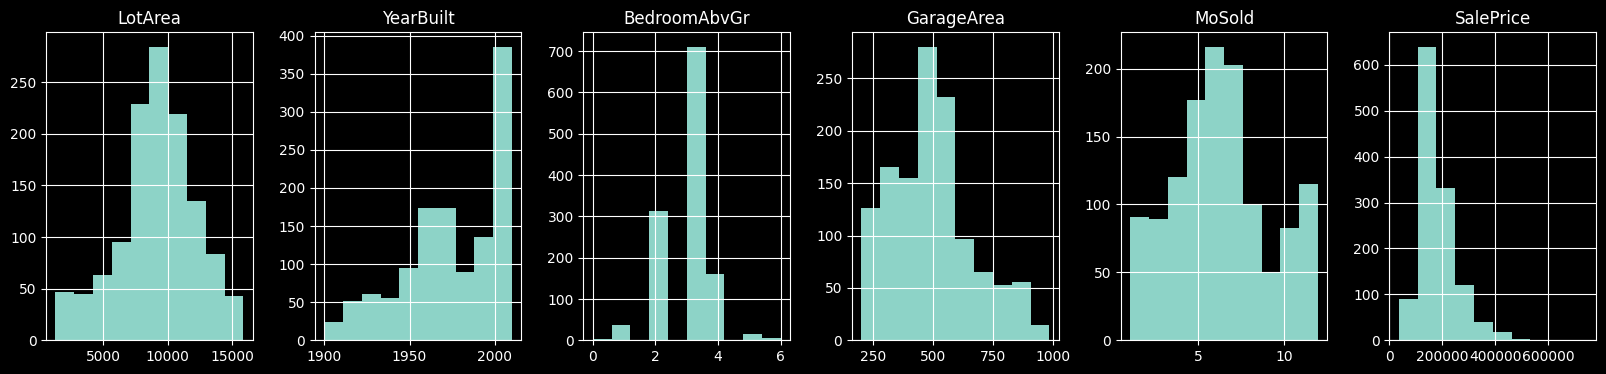

In [297]:
fig, axs = plt.subplots(1,6,figsize=(20,  4)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим, что у нас будет 1 строка и 4 столбца

df.hist(column = num_columns_new, ax = axs);

**Нормализация**

In [298]:
DF  = df.copy()
Xmin = df[num_columns_new].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns_new].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF[num_columns_new] = (df[num_columns_new]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

**Стандартизация**

In [299]:
M = DF[num_columns_new].mean() # находим среднее (для каждого числового признака)
STD = DF[num_columns_new].std() # находим стандартное отклонение (для каждого числового признака)
DF[num_columns_new] = (DF[num_columns_new]-M)/STD # реализуем стандартизацию. матричные операции работают

**Степенное преобразование**

In [300]:
pt = PowerTransformer()

pt.fit(DF[num_columns_new]);

In [301]:
power = pt.transform(DF[num_columns_new])
df_power = pd.DataFrame(power, columns= num_columns_new)
df_power

,LotArea,YearBuilt,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,-0.306116,1.107616,0.196830,0.426528,-1.722636,0.653393
1,0.077258,-0.121489,0.196830,-0.092431,-0.462927,0.280031
2,0.670275,1.003802,0.196830,0.743289,0.996955,0.827796
3,0.060031,-1.764715,0.196830,0.913253,-1.722636,-0.512424
4,1.847303,0.952598,1.510394,1.792297,1.968945,1.096774
...,...,...,...,...,...,...
1239,-0.475720,0.901870,0.196830,-0.092431,0.655154,0.174496
1240,1.411101,-0.044420,0.196830,0.153177,-1.722636,0.671714
1241,-0.112084,-1.174282,1.510394,-1.591973,-0.462927,1.244976
1242,0.117757,-0.941272,-1.100337,-1.687737,-0.870326,-0.465188


## Предварительная обработка категориальных признаков

**Порядковое кодирование**

In [302]:
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns_new]);

Ordinal_encoded = ordinal.transform(DF[cat_columns_new])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns_new)

**One-hot кодирование многозначных признаков**

In [303]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output= False)
ohe.fit(DF[cat_columns_new]);

ohe_feat = ohe.transform(DF[cat_columns_new])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

## Pipeline

In [304]:
num_pipe_lotArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler())
])
num_lotArea = ['LotArea']

num_pipe_GarArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler()),
     ('power', PowerTransformer())
])
num_GarArea = ['GarageArea']

num_pipe_BAG = Pipeline([
    ('power', PowerTransformer())
])
num_BAG = ['BedroomAbvGr']

num_pipe_YB = Pipeline([
    ('power', PowerTransformer())
])
num_YB = ['YearBuilt']

num_pipe_SP = Pipeline([
    ('power', PowerTransformer())
])
num_SP = ['SalePrice']

num_pipe_moSold = Pipeline([
    ('scaler', StandardScaler())
])
num_moSold = ['MoSold']

cat_pipe_street = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_street = ['Street']

cat_pipe_util = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_util = ['Utilities']

cat_pipe_lotCon = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_lotCon = ['LotConfig']

cat_pipe_con1 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_con1 = ['Condition1']

cat_pipe_roofSt = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_roofSt = ['RoofStyle']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('cat_street', cat_pipe_street, cat_street),
    ('cat_util', cat_pipe_util, cat_util),
    ('cat_lotCon', cat_pipe_lotCon, cat_lotCon),
    ('cat_con1', cat_pipe_con1, cat_con1),
    ('cat_roofSt', cat_pipe_roofSt, cat_roofSt),
])

In [305]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

In [306]:
columns_num = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,])

In [307]:
preprocessors_all.fit(DF);

# Обучение базовой модели

**Считываем данные, разбиваем на тестовую и тренировочную**

In [308]:
X = DF.drop(columns = ["SalePrice"])
y = DF["SalePrice"]
features_names = DF.drop(columns = ["SalePrice"]).columns


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)

**Преобразуем данные**

In [309]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационных данных
X_test_prep = preprocessors_num.transform(X_test)

**Применение регрессии**

Связь между нашими данными нелинейная и у некоторых независимых переменных есть большая разница в значениях. Поэтому нужно использовать TransformedTargetRegressor

In [310]:
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(
        max_leaf_nodes=40,
        min_samples_split=10,
        criterion='absolute_error'
    ),
    transformer=PowerTransformer()
)

model.fit(X_train_prep, y_train);

y_predict = model.predict(X_test_prep)

**Значимость признаков**

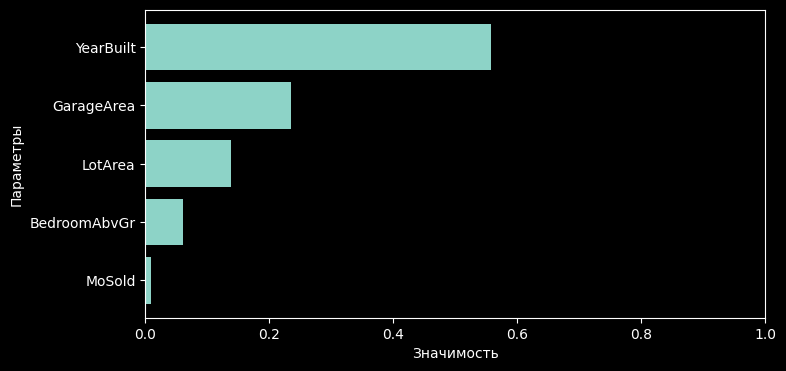

In [311]:
feature_importance_plotter(model, columns_num)

Видно, что YearBuilt самый значимый признак

**Распределение предсказания**

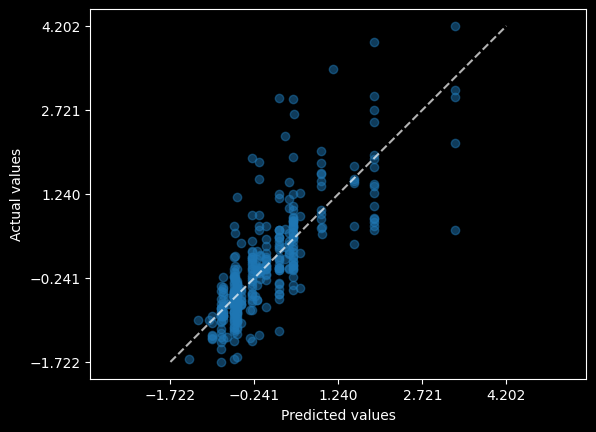

In [312]:
PredictionErrorDisplay.from_predictions(
    y_test,
    model.predict(X_test_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'white'}

);

Модель показывает неплохую точность, так как точки располагаются близко к диагонали, но есть несколько выбросов.

**Метрики (кросс-валидация)**

In [313]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5))

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.038127,0.007806,0.579638,-0.377270,-0.419138,-2.411791
1,0.040496,0.005553,0.585198,-0.318117,-0.395918,-2.050702
2,0.049383,0.005649,0.571641,-0.304306,-0.362503,-2.553062
3,0.037266,0.005838,-0.032978,-1.016357,-0.537798,-7.067258
4,0.066066,0.006404,-0.146621,-0.874047,-0.464039,-7.067258




test_R2      0.311376
test_-MSE   -0.578020
test_-MAE   -0.435879
test_Max    -4.230014
dtype: float64
Ошибка на тестовых данных
MSE: 0.3
RMSE: 0.3
R2 : 0.6187


Показатели этой модели намного лучше, чем у базовой модели линейной регрессии из прошлой домашки (№6). Ниже представлены показатели для сравнения

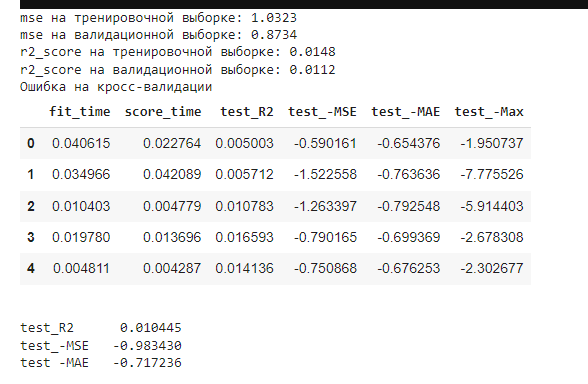

# Добавляем новые признаки

## Оценим оптимальное число кластеров методом Локтя

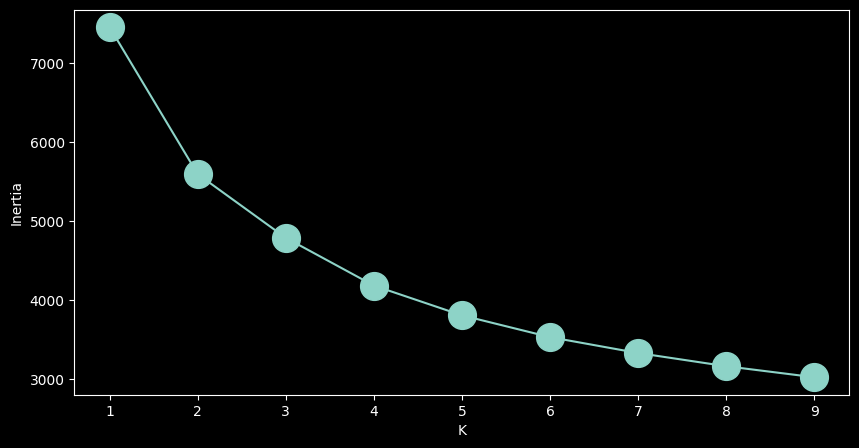

In [314]:
dataframe = DF[num_columns_new]
X = dataframe.values

sse = [] # здесь будем хранить инерции для конкретных к
list_k = list(range(1, 10))
for k in list_k: # тестируем различные к в диапазоне от 1 до 10
    km = KMeans(n_clusters=k, # создаем объект кластеризации с заданным к
            n_init = 10)
    km.fit(X) # обучаем
    sse.append(km.inertia_) # фиксируем текущую инерцию

# визуализируем метод локтя

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', markersize = 20)
plt.xlabel('K')
plt.ylabel('Inertia');

Попробуем сделать 3 кластера


## Кластеризация K-Means

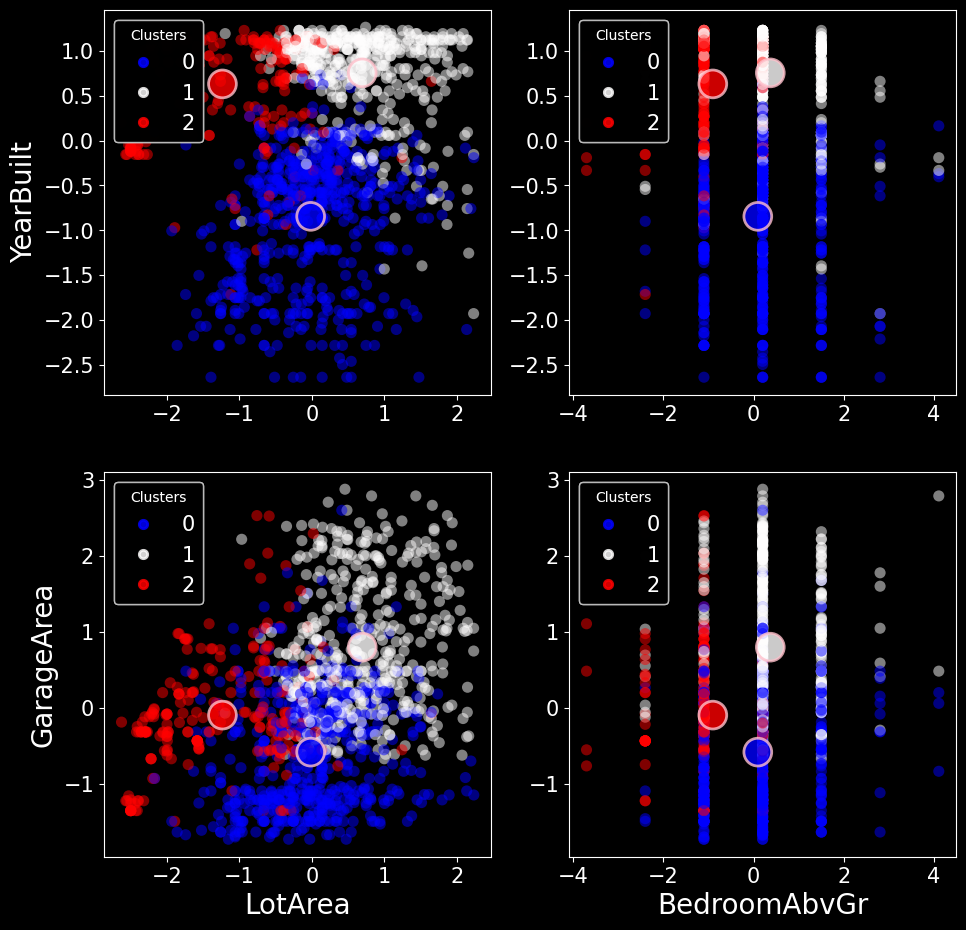

In [315]:
dataframe = DF[num_columns_new]
k = 3

X = dataframe.values

km = KMeans(n_clusters=k,
            n_init = 10)

km.fit(X)
labels = km.predict(X)
centroids = km.cluster_centers_
label_centroids = km.predict(centroids)

fig, sub = plt.subplots(2, 2, figsize = (11,11))
plot_multi(X, labels,
           dataframe.columns,
           sub, size = 64);

plot_multi(centroids, label_centroids,
           dataframe.columns,
           sub,
           alpha = 0.8,
           size = 400,
           edgecolors = 'pink');

Добавляем признаки связанные с кластером

In [316]:
DF_cluster = pd.DataFrame(km.transform(DF[num_columns_new]))
DF_cluster['cluster'] = km.predict(DF[num_columns_new])
DF_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names


,0,1,2,cluster
0,2.813581,2.096583,2.267483,1
1,1.276650,1.729296,1.911247,0
2,2.787717,1.011273,2.741513,1
3,2.512449,3.696781,3.724452,0
4,4.662825,2.811939,5.027130,1
...,...,...,...,...
1239,1.993038,1.890481,1.588615,2
1240,2.605398,2.140664,3.274844,1
1241,2.509133,3.305323,3.794600,0
1242,1.743424,3.652926,2.625938,0


Преобразуем числовые признаки в виде расстояния до центров кластеров

In [317]:
# Создаем копию для числовых признаков
distance_features = DF_cluster.iloc[:, :-1]  # Все столбцы, кроме 'cluster'
scaler = StandardScaler()

# Масштабируем расстояния
distance_scaled = scaler.fit_transform(distance_features)

# Преобразуем обратно в DataFrame
distance_scaled_df = pd.DataFrame(distance_scaled, columns=[f'Distance_to_Cluster_{i}' for i in range(distance_features.shape[1])])

# Обновляем DataFrame с обработанными расстояниями
DF_cluster = pd.concat([distance_scaled_df, DF_cluster[['cluster']]], axis=1)

Добавляем обработанные признаки к исходным данным

In [318]:
DF = pd.concat([DF, DF_cluster], axis=1)

# Подбирем оптимальные гиперпараметры с помощью рандомизированного поиска

In [319]:
# словарь гиперпараметров в виде
# обозначение гиперпараметров : из какого распределения сэмплируем
# обозначение должно "досимвольно" совпадать с тем что в документации
alpha_range = loguniform(1e-5, 1e5)

tuned_parameters = [{'alpha':  alpha_range }]

# количество итераций
n_iter_search = 20

Ridge_search = RandomizedSearchCV(estimator = Ridge(random_state = 42),  # оптимизируем нашу модель
                                verbose = 3,  # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_distributions=tuned_parameters , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций
                          )

In [320]:
Ridge_search.fit(X_train_prep, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...........alpha=363.3175331108751;, score=0.511 total time=   0.0s
[CV 2/5] END ...........alpha=363.3175331108751;, score=0.350 total time=   0.0s
[CV 3/5] END ...........alpha=363.3175331108751;, score=0.460 total time=   0.0s
[CV 4/5] END ...........alpha=363.3175331108751;, score=0.642 total time=   0.0s
[CV 5/5] END ...........alpha=363.3175331108751;, score=0.526 total time=   0.0s
[CV 1/5] END .........alpha=0.10142278080646941;, score=0.504 total time=   0.0s
[CV 2/5] END .........alpha=0.10142278080646941;, score=0.358 total time=   0.0s
[CV 3/5] END .........alpha=0.10142278080646941;, score=0.504 total time=   0.0s
[CV 4/5] END .........alpha=0.10142278080646941;, score=0.640 total time=   0.0s
[CV 5/5] END .........alpha=0.10142278080646941;, score=0.532 total time=   0.0s
[CV 1/5] END .......alpha=0.0003254960466015325;, score=0.504 total time=   0.0s
[CV 2/5] END .......alpha=0.0003254960466015325

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
                   estimator=Ridge(random_state=42), n_iter=20,
                   param_distributions=[{'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b7a8d4dbb50>}],
                   verbose=3)

In [321]:
Ridge_search.best_estimator_

Ridge(alpha=12.037874034184421, random_state=42)

In [322]:
Ridgebest=Ridge_search.best_estimator_

Ridgebest.fit(X_train_prep, y_train);

In [323]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

cross_validation (X_train_prep, y_train,
                  Ridgebest,
                  scoring_reg,
                  ShuffleSplit(n_splits=5))

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.004452,0.004971,0.717572,-0.280983,-0.379298,-2.107263
1,0.002232,0.003653,0.571065,-0.270104,-0.395311,-1.516865
2,0.002387,0.003714,0.674299,-0.435906,-0.468150,-2.365391
3,0.002203,0.003639,0.368820,-1.067075,-0.567434,-7.522614
4,0.002150,0.003617,0.551109,-0.317786,-0.460312,-1.549879




test_R2      0.576573
test_-MSE   -0.474371
test_-MAE   -0.454101
test_Max    -3.012402
dtype: float64
Ошибка на тестовых данных
MSE: 0.3
RMSE: 0.3
R2 : 0.6187


Метрики на кросс-валидации улучшились, а на тестовых остались такими же

In [324]:
DF_reg=pd.DataFrame(Ridge_search.cv_results_)
DF_reg

DF = DF_reg[['param_alpha',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_alpha,mean_test_score,std_test_score,rank_test_score
5,12.037874,0.508543,0.090520,1
16,5.211151,0.508001,0.090294,2
10,2.328319,0.507756,0.090197,3
14,2.173187,0.507743,0.090192,4
18,0.806771,0.507623,0.090145,5
9,0.524382,0.507598,0.090136,6
1,0.101423,0.507561,0.090121,7
19,0.080798,0.507559,0.090120,8
4,0.026637,0.507554,0.090119,9
6,0.001597,0.507552,0.090118,10


Выходит неообучение

# Подбираем оптимальные гиперпараметры по сетке параметров

In [325]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor( regressor=Lasso(random_state = 42),
    transformer=PowerTransformer())
    )
])

pipe_all_transform

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model',
                 TransformedTargetRegressor(regressor=Lasso(random_state=42),
                                            transformer=PowerTransformer()))])

In [326]:
alpha_range = 10**np.linspace(-3, 3,5)

param_grid = {
    # ВАЖНО используем "имена" которые есть у компонент Pipeline и разделяем их __ (две земли)
    "preprocessors__num_lotArea__QuantReplace__threshold": [0, 0.01],
    "preprocessors__num_GarArea__QuantReplace__threshold": [0, 0.001],
    "model__regressor__alpha": alpha_range,
}

In [327]:
scorer = make_scorer(r2_score)

In [328]:
Pipe_GS = GridSearchCV(estimator = pipe_all_transform, # оптимизируем наш pipeline
                       param_grid=param_grid , # что оптимизируем - берем из словарика
                       cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                       scoring = scorer, # указываем метрику которую оптимизируем
                       verbose = 3 # чтобы он всё подробно расписал. если не интересно - пишем 0
                       )
Pipe_GS

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
             estimator=Pipeline(steps=[('preprocessors',
                                        ColumnTransformer(transformers=[('num_lotArea',
                                                                         Pipeline(steps=[('QuantReplace',
                                                                                          QuantileReplacer(threshold=0.01)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea']),
                                                                        ('num_GarArea',
                                                                         Pipeline(steps=[('QuantReplace',
                                                                                          QuantileReplacer...
                                                                   transformer=PowerTransformer()))]),
             param_grid={'model__regressor__alpha': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'preprocessors__num_GarArea__QuantReplace__threshold': [0,
                                                                                 0.001],
                         'preprocessors__num_lotArea__QuantReplace__threshold': [0,
                                                                                 0.01]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=3)

In [329]:
Pipe_GS.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__regressor__alpha=0.001, preprocessors__num_GarArea__QuantReplace__threshold=0, preprocessors__num_lotArea__QuantReplace__threshold=0;, score=0.661 total time=   0.1s
[CV 2/5] END model__regressor__alpha=0.001, preprocessors__num_GarArea__QuantReplace__threshold=0, preprocessors__num_lotArea__QuantReplace__threshold=0;, score=0.565 total time=   0.1s
[CV 3/5] END model__regressor__alpha=0.001, preprocessors__num_GarArea__QuantReplace__threshold=0, preprocessors__num_lotArea__QuantReplace__threshold=0;, score=0.628 total time=   0.1s
[CV 4/5] END model__regressor__alpha=0.001, preprocessors__num_GarArea__QuantReplace__threshold=0, preprocessors__num_lotArea__QuantReplace__threshold=0;, score=0.729 total time=   0.1s
[CV 5/5] END model__regressor__alpha=0.001, preprocessors__num_GarArea__QuantReplace__threshold=0, preprocessors__num_lotArea__QuantReplace__threshold=0;, score=0.649 total time=   0.1s
[CV 1/5]

In [330]:
Pipe_best=Pipe_GS.best_estimator_
Pipe_best

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num_BAG',...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model',
                 TransformedTargetRegressor(regressor=Lasso(alpha=0.001,
                                                            random_state=42),
                                            transformer=PowerTransformer()))])

In [331]:
Pipe_best.fit(X_train, y_train);

In [332]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

cross_validation (X_train, y_train,
                  Pipe_best,
                  scoring_reg,
                  ShuffleSplit(n_splits=5))

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.056107,0.023575,0.612712,-0.293253,-0.373938,-1.980923
1,0.056948,0.031102,0.661114,-0.351895,-0.392949,-2.959654
2,0.054713,0.024530,0.726737,-0.223520,-0.330843,-2.041455
3,0.055378,0.029153,0.685921,-0.360211,-0.408681,-2.973870
4,0.081284,0.033388,0.698115,-0.255295,-0.332648,-2.151756




test_R2      0.676920
test_-MSE   -0.296835
test_-MAE   -0.367812
test_Max    -2.421532
dtype: float64
Ошибка на тестовых данных
MSE: 0.3
RMSE: 0.3
R2 : 0.6187


Гиперпараметры, подобранные по сетке параметров, работают лучше чем гиперпараметры, подобранные с помощью рандомизированного поиска. Сравнивая базовую модель и с гиперпараметрами по метрикам, как минимум увеличился r2 и чуть уменьшился MaxError, хотя на тестовых данных все остается таким же

# Анализируем результат

In [333]:
!pip install dtreeviz

In [334]:
import dtreeviz

In [335]:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [336]:
viz_reg = dtreeviz.model(model.regressor_,
               X_train_prep, y_train,
               target_name='SalePrice',
               feature_names=list(columns_num))

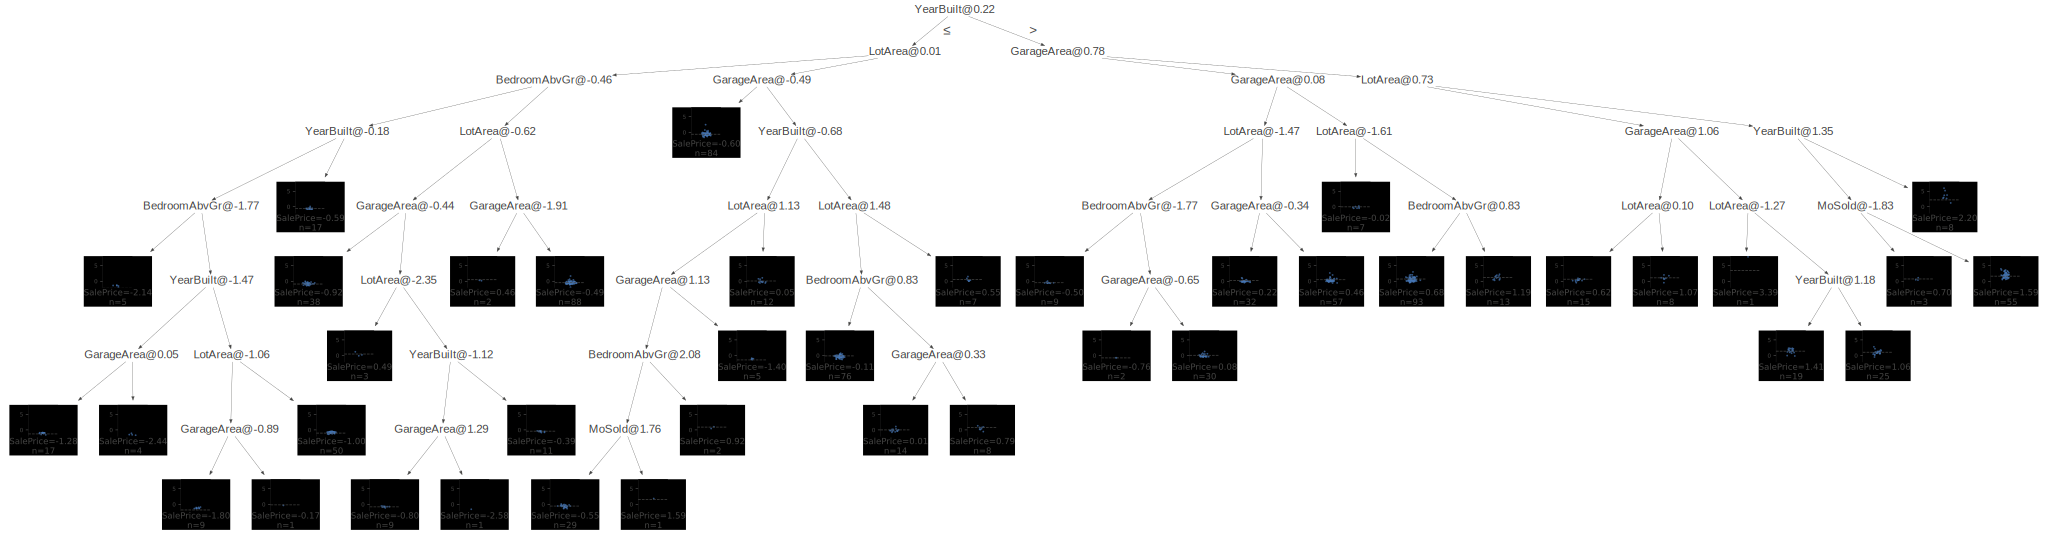

In [337]:
viz_reg.view(fancy=False)

**Средняя цена на листьях**

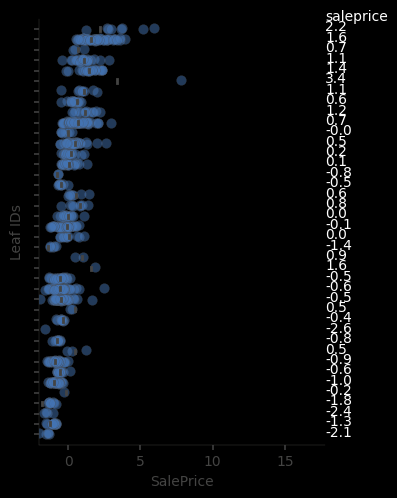

In [338]:
viz_reg.rtree_leaf_distributions()

**Распределение по листам**

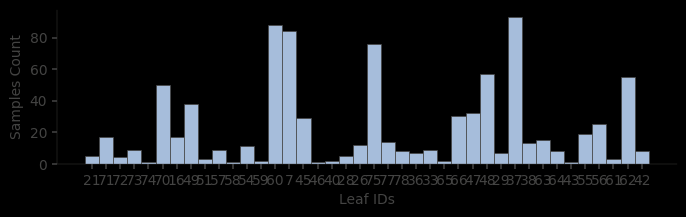

In [339]:
viz_reg.leaf_sizes(figsize=(8,2))

Данные распреределенны по листам неравномерно

**Ошибка для листов**

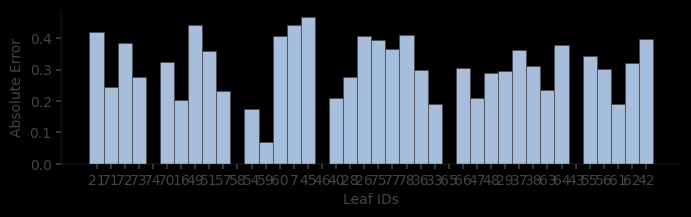

In [340]:
viz_reg.leaf_purity(figsize=(8,2))

Практически для всех листов ошибка высока. Исключениями являются листы 16 и 33

**Зависимость между признаком YearBuilt и целевой переменной SalePrice**

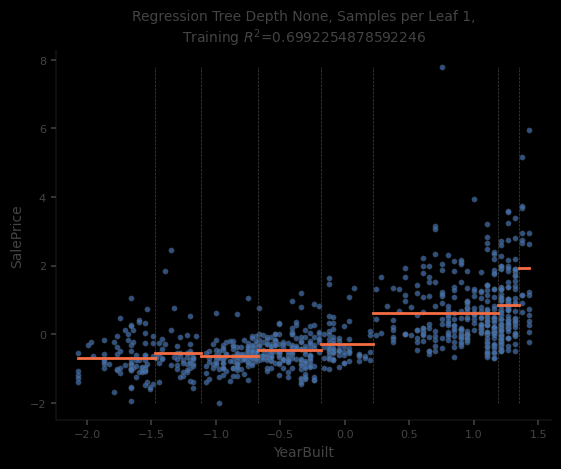

In [341]:
viz_reg.rtree_feature_space(features=['YearBuilt'])

Каждая горизонтальная линия соответствует одному листу дерева. Видны выбросы, которые модель не описывает. Но общую тенденцию модель описать может.

## Оценка влияния категориальных признаков

In [342]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', DecisionTreeRegressor(max_leaf_nodes=40,
                              min_samples_split=5,
                              criterion = 'absolute_error'
                              )
    )
])

In [343]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_leaf_nodes=40,
                                       min_samples_split=5))])

In [344]:
cat_street_names = pipe_all['preprocessors'].transformers_[5][1]['encoder'].get_feature_names_out(cat_street)
cat_util_names = pipe_all['preprocessors'].transformers_[6][1]['encoder'].get_feature_names_out(cat_util)
cat_lotCon_names = pipe_all['preprocessors'].transformers_[7][1]['encoder'].get_feature_names_out(cat_lotCon)
cat_con1_names = pipe_all['preprocessors'].transformers_[8][1]['encoder'].get_feature_names_out(cat_con1)
cat_roofSt_names = pipe_all['preprocessors'].transformers_[9][1]['encoder'].get_feature_names_out(cat_roofSt)


# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

In [345]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_reg,
                  ShuffleSplit(n_splits=5))

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


Ошибка на кросс-валидации


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.224371,0.037127,0.437286,-0.419121,-0.414688,-3.032554
1,0.233356,0.041460,0.718349,-0.399299,-0.411063,-3.108485
2,0.173030,0.056530,0.562308,-0.559893,-0.501822,-2.434301
3,0.375911,0.037573,0.686231,-0.353000,-0.391651,-2.630574
4,0.160870,0.067608,0.244410,-0.900992,-0.593561,-5.755361




test_R2      0.529717
test_-MSE   -0.526461
test_-MAE   -0.462557
test_Max    -3.392255
dtype: float64
Ошибка на тестовых данных
MSE: 0.3
RMSE: 0.3
R2 : 0.6187


Почему то модель вместе с категориальными признаками стала работать хуже



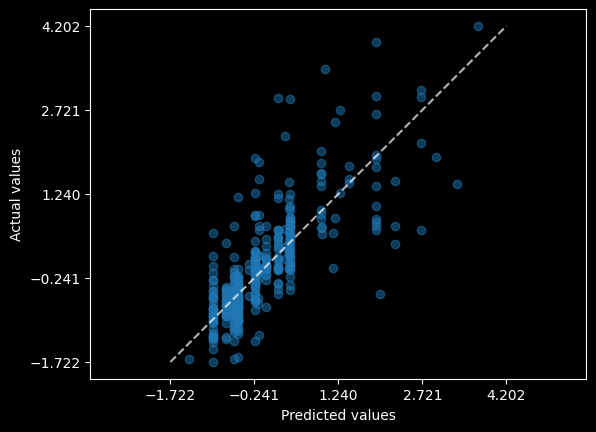

In [346]:
PredictionErrorDisplay.from_predictions(
    y_test,
    pipe_all.predict(X_test),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'white'}

);

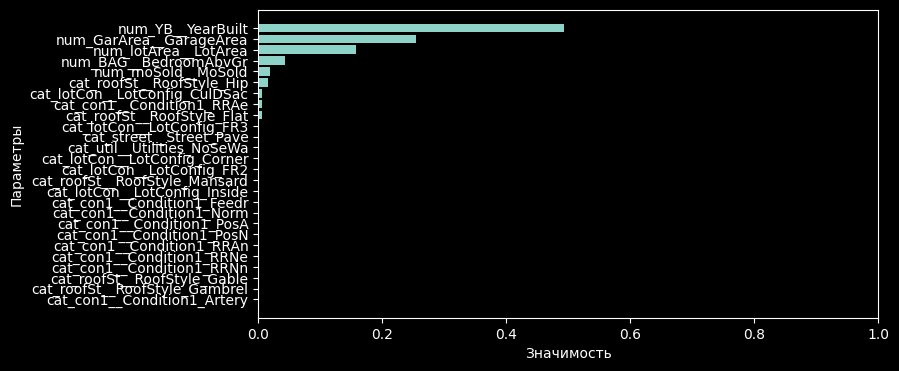

In [347]:
feature_names = pipe_all['preprocessors'].get_feature_names_out()
feature_importance_plotter_1(pipe_all['model'], feature_names)

Видно, что больше всего все равно влияют числовые признаки. Однако среди категориальных есть те, что имеют значимость. Например LotArea и RoofStyle

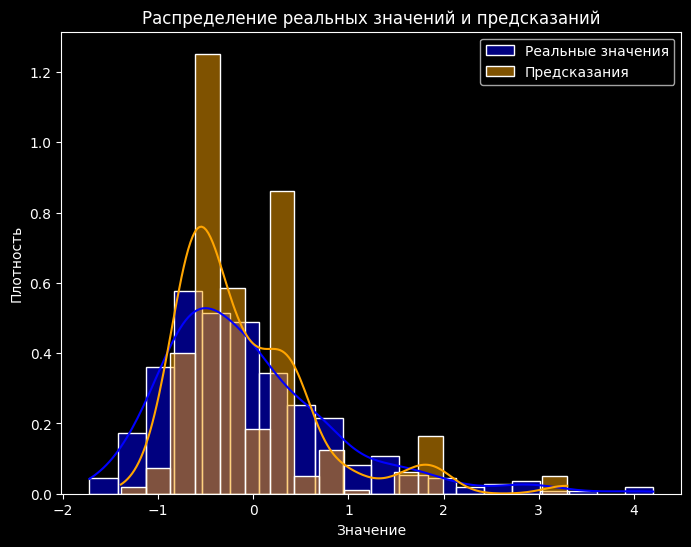

In [348]:
# Построение гистограмм
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True, color="blue", label="Реальные значения", stat="density")
sns.histplot(y_predict, kde=True, color="orange", label="Предсказания", stat="density")
plt.legend()
plt.title("Распределение реальных значений и предсказаний")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.show()

Распределение похоже, но есть огромные выбросы в разнице между предсказанными и реальными значениями

# Выводы

Модель Дерева Решений также работает лучше с гиперпараметрами, выбранными по сетке параметров. На моменте использования гиперпараметров по сетке параметров модель Дерева Решений работает лучше, чем модель регрессии. Однако влияние категориальных признаков сделали модель хуже